In [ ]:
#주성분분석 (R프로그래밍에 알고리즘을 공부할 때 상관분석, 연관분석에서 주성분분석을 같이 살펴봤었음.)
#  : 유사한 핏쳐 특징들을 적절한 전처리(둘 중에 하나만 선택, 평균을 구하여 사용 등)를 통해서 
#    핏쳐간의 관련성을 약하게 하여 핏쳐의 수를 줄이면서 학습을 시키도록 한다. (차원을 축소하여 저차원으로 실행하고자 함) 
#    또한, 분산을 유지하면서 데이터의 고유한 특성을 최대한 유지하도록 한다.

#    ***주성분분석은 차원(핏쳐의 갯수로 생각)을 축소하면서도 핏쳐의 특징이 그대로 유지되어질 수 있도록 하는 것이 핵심 포인트이다.

# ex) 음악파일을 압축한다고 할 때, 원음이 손실되지 않도록 파일의 크기를 줄여가도록 한다. 
#     즉, 차원을 축소한다면 기존 차원을 유지하면서 줄여갈 수 있도록 해야한다.

#2차원에서 1차원으로 차원축소를 하면 축을 기준으로 하나의 라인에 투영하도록 함 => 문제는 데이터간의 겹침 발생(원데이터의 의미가 손실)
#이때 손실을 최소화할 수 있는 1차함수의 직선을 통해 데이터를 투영한다고 한다면 데이터 겹침이 해소됨
#즉, 기존 데이터 분산을 2차원에서 1차원으로 표현을 했을 때도 데이터 분산이 최대가 되어지는 
#    직선을 찾을 수만 있다면 차원축소가 가능하다는 것이 주성분분석의 포인트가 된다.
#    !!분산의 정도를 크게 잡아주는 것임(데이터의 중첩이 가장 적은 것)!! = 데이터의 특징을 유지하면서 겹침을 해소함
#분산이 가장 큰 차원(=고유 벡터)을 찾기 위해서 고유값을 찾아야 함

#상관분석에서 주성분분석을 사용했었음. 이때 상관분석은 두 핏쳐간의 관계성이였음. 
#공분산행렬은 상관계수의 수학적 표현이라고 생각하면 됨.
#ex) x1의 값이 커질 때 x2도 커진다 -> 두 핏쳐의 관계성이 1에 가깝다고 표현할 수 있음
#    두 핏쳐간의 관계가 독립적일 때는 상관계수에서 0의 의미를 가짐

# 식습관 데이터를 차원 축소 시켜서 시각화하기
* 고차원 데이터를 1차원 데이터로 줄여서 시각화해보는 실습.

In [1]:
import pandas as pd

# 데이터 획득
- 주성분 분석을 실습하기 위한 데이터를 만들어보자.    
- 사람들의 하루 식습관 데이터를 만든 후, 주성분 분석을 사용하여 시각화.
- 칼로리, 아침, 점심, 저녁, 운동 횟수, 그리고 체형이라는 특징을 가진 데이터프레임을 생성

In [2]:
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

In [3]:
# 10명의 가공 데이터를 만듦.

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [4]:
df
#머신러닝과 딥러닝은 수치형으로 데이터를 처리하게끔 기능을 제공해주고 있음.
#현재 데이터를 보면 수치형이지만 현재 사용하고 있는 데이터의 단위가 다르다는 문제점이 발생
#calory의 수치값이 다른 컬럼에 비해서 훨씬 더 큰 값을 가지고 있음.
#머신러닝과 딥러닝의 알고리즘을 사용하게 되면 칼로리 데이터가 전적으로 영향을 미치는 학습이 될 가능성이 높음
#이렇듯 단위값의 차이점으로 데이터의 범위가 차이난다면 범위를 통일 시켜주는 것이 중요함!!

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


# 데이터 전처리

In [5]:
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
X

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0
9,3000,1,2,1,1


In [6]:
Y = df[['body_shape']]
Y

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


In [8]:
# 표준화 (표준정규분포(표준화)는 평균이 0이고 표준편차를 1로 바꿔준 분포곡선을 말한다.)
# 현재 내 데이터에서 평균값을 빼고 그 뺀 평균값을 표준편차로 계산되어진 값을 표준화라고 한다.

from sklearn.preprocessing import StandardScaler #데이터를 표준화시킬 수 있는 모듈의 기능을 import하도록 함.

x_std = StandardScaler().fit_transform(X) #인스턴스생성 => 모델을 생성 / 학습을 시키고 결과를 리턴해줌
x_std #표준화 시켜서 결과를 출력해주고 있는 것을 확인할 수 있음

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

# 공분산 행렬 구하기
* 주성분 분석을 하기 위해 가장 먼저 특징들의 공분산 행렬을 구해야함.

In [9]:
import numpy as np

features = x_std.T #전치행렬을 구함 => 행렬이 바뀌어지는 것
covariance_matrix = np.cov(features) #공분산행렬 함수 -> cov()
print(covariance_matrix) #현재 차원이 5차원의 데이터임

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


# 고유값(eigen value)과 고유벡터 구하기

In [10]:
#공분산행렬에서 가장 큰 고유값을 가지는 고유벡터를 찾아서 데이터들을 차원시키도록 하자.
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix) #공분산행렬을 입력으로 넣어주도록 함/ 고유값과 고유벡터를 리턴해줌
eig_vecs

array([[-0.508005  , -0.0169937 , -0.84711404,  0.11637853,  0.10244985],
       [-0.44660335, -0.36890361,  0.12808055, -0.63112016, -0.49973822],
       [-0.38377913,  0.70804084,  0.20681005, -0.40305226,  0.38232213],
       [-0.42845209, -0.53194699,  0.3694462 ,  0.22228235,  0.58954327],
       [ 0.46002038, -0.2816592 , -0.29450345, -0.61341895,  0.49601841]])

In [11]:
eig_vals #1차원으로 투영해서 결과적으로 값을 확인할 수 있음

array([4.0657343 , 0.8387565 , 0.07629538, 0.27758568, 0.2971837 ])

In [12]:
# 가장 큰 고유벡터의 정보 함유량 계산
eig_vals[0] / sum(eig_vals) #하나의 고유벡터값에 고유값의 총 합으로 나누도록 함
# -> 가장 큰 고유 벡터가 73%의 정보를 함유하고 있음. 
# 거꾸로 손실은 27%정도 발생할 수 있음

0.7318321731427542

# 5차원 데이터를 1차원의 고유벡터로 사영시키기
- a 벡터를 b 벡터에 사영할 때 공식 = dot(a, b) / magnitude(b)

In [13]:
projected_X = x_std.dot(eig_vecs.T[0]) / np.linalg.norm(eig_vecs.T[0])

In [14]:
projected_X #현재 1차원으로 최종 벡터에 사용되어진 좌표의 결과값을 계산해서 리턴해주고 있는 값이 된다.

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

# 시각화
* 1차원으로 축소된 데이터를 시각화하기 위해, 판다스 데이터프레임에 데이터를 담는다.   
* 주성분(PC1)을 x축으로 하고, 1차원 데이터이므로 y축은 0으로 통일.
* 데이터의 쉬운 이해를 위해 클래스를 데이터 마지막 컬럼에 포함.

In [15]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0 #x에 투영을 시키기 때문에 y값을 0으로 잡아준 것임
result['label'] = Y #체형에 대한 정보를 같이 출력

In [16]:
result

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


Text(0.5, 1.0, 'PCA result')

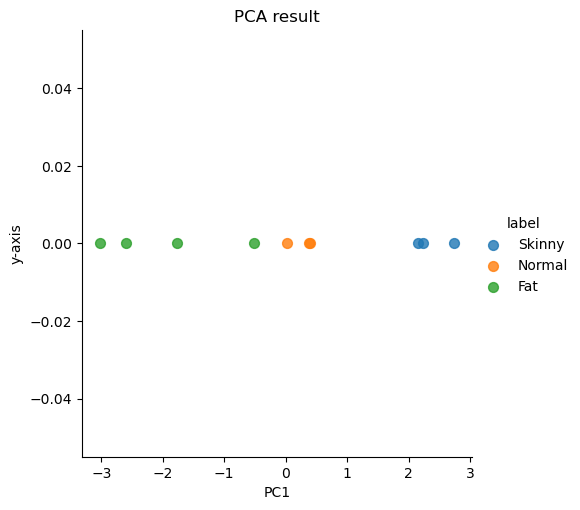

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(data=result, x='PC1', y='y-axis', fit_reg=False, 
          scatter_kws={'s':50}, hue='label') #scatter_kws 점의 사이즈 조절 / hue 시각화할 결과값을 지정!!

plt.title('PCA result')

# 사이킷런을 활용한 주성분 간단 구현

In [20]:
from sklearn import decomposition 

pca = decomposition.PCA(n_components=1) #모델 생성 / n_components차원수를 지정
#PCA클래스로 주성분분석에 대한 처리를 수행할 수 있는 알고리즘을 제공해주고 있음
sklearn_pca_x = pca.fit_transform(x_std) #학습을 시켜서 최적의 알고리즘 도출
#transform변환된 값을 반환해주게 됨 -> 이를 시각화하여 살펴볼 예장

In [21]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

Text(0.5, 1.0, 'PCA result')

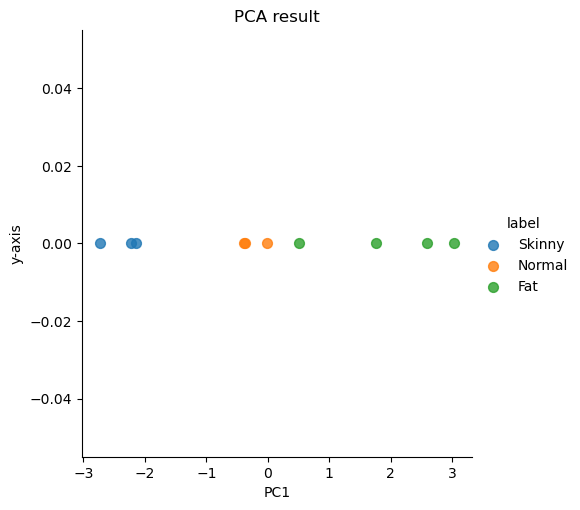

In [22]:
sns.lmplot(data=sklearn_result, x='PC1', y='y-axis', fit_reg=False, 
          scatter_kws={'s':50}, hue='label') #scatter_kws 점의 사이즈 조절 / hue 시각화할 결과값을 지정!!

plt.title('PCA result') #위에 시각화랑 순서만 바뀌어서 동일하게 출력되어지고 있음 / skinny에 중첩되는 것이 손실임. 